# Importing the Libraries and Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, mean_absolute_error,\
mean_squared_error, r2_score

# Data Collection and Processing

In [2]:
#Data acquisition of the iris dataset

iris_data = pd.read_csv('IRIS.csv')
iris_data.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# print number of rows and columns on iris dataset.
iris_data.shape

(150, 5)

In [4]:
# print the information of iris dataset.
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal Length  150 non-null    float64
 1   Sepal Width   150 non-null    float64
 2   Petal Length  150 non-null    float64
 3   Petal Width   150 non-null    float64
 4   Class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
# counting number of zeroes in each column of Diabetes dataset.
(iris_data == 0).sum()

Sepal Length    0
Sepal Width     0
Petal Length    0
Petal Width     0
Class           0
dtype: int64

In [6]:
# find the number of missing values in each column on movie dataset.
iris_data.isnull().sum()

Sepal Length    0
Sepal Width     0
Petal Length    0
Petal Width     0
Class           0
dtype: int64

## Converting the Class column into Categorical Class Column
### 1- Iris-setosa
### 2- Iris-versicolor
### 3- Iris-virginica

In [7]:
iris_data.replace({'Class':{'Iris-setosa':1,'Iris-versicolor':2, 'Iris-virginica':3}}, inplace = True)

In [8]:
iris_data.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Class
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


# Performing Data Analysis

In [9]:
# Performing statistics for each column
iris_data.describe()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,2.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,1.000000
25%,5.100000,2.800000,1.600000,0.300000,1.000000
50%,5.800000,3.000000,4.350000,1.300000,2.000000
75%,6.400000,3.300000,5.100000,1.800000,3.000000
max,7.900000,4.400000,6.900000,2.500000,3.000000


In [10]:
iris_data['Class'].value_counts()

1    50
2    50
3    50
Name: Class, dtype: int64

In [11]:
iris_data.groupby('Class').mean()

,Sepal Length,Sepal Width,Petal Length,Petal Width
Class,,,,
1,5.006,3.418,1.464,0.244
2,5.936,2.770,4.260,1.326
3,6.588,2.974,5.552,2.026


# Data Visualisation

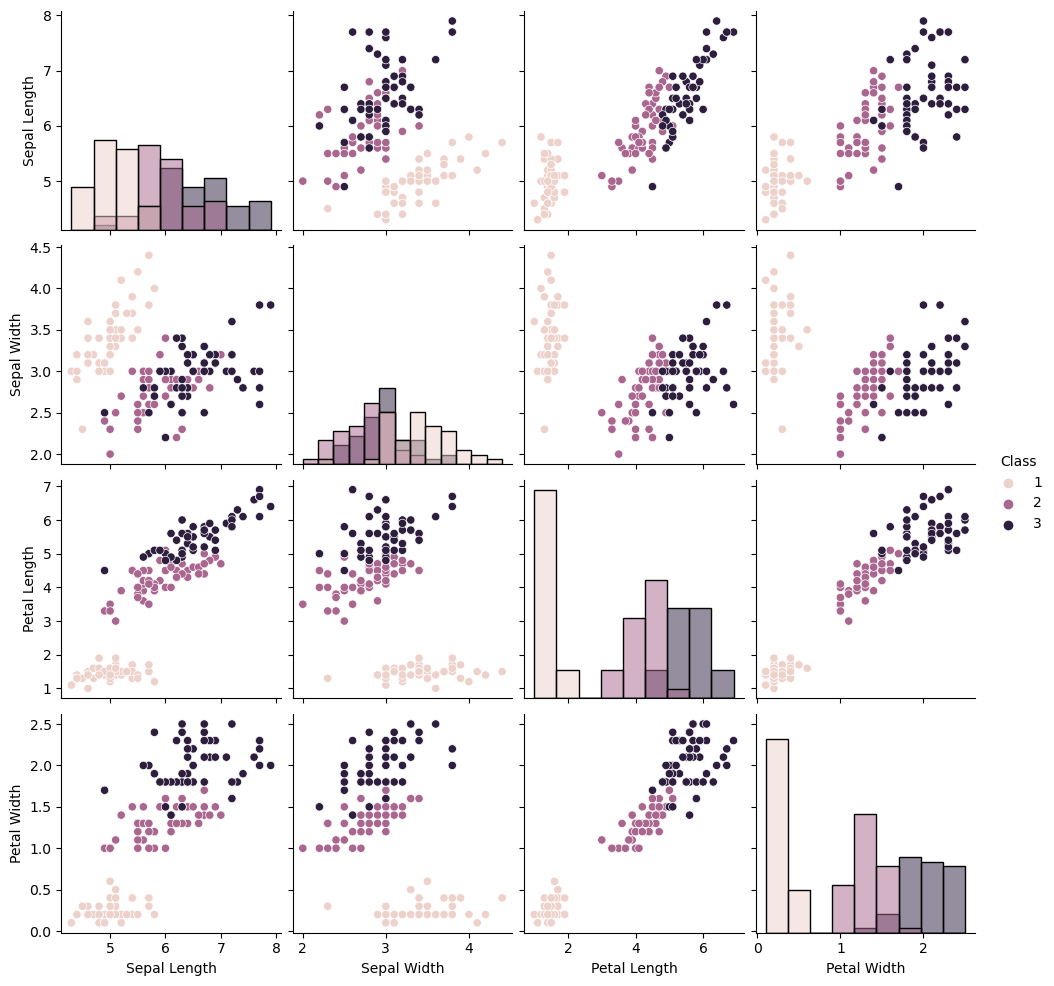

In [12]:
sb.pairplot(iris_data, hue='Class', diag_kind='hist')
plt.show()

Text(0, 0.5, 'Petal Width')

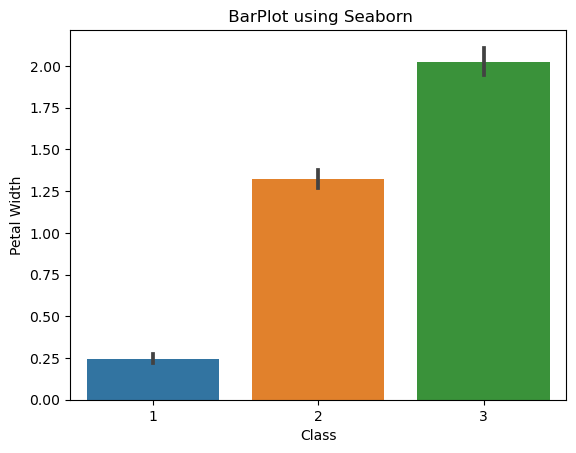

In [13]:
sb.barplot(x = iris_data['Class'],y = iris_data['Petal Width'] ) 
plt.title(" BarPlot using Seaborn")  
plt.xlabel("Class")  
plt.ylabel("Petal Width")

<Figure size 500x500 with 0 Axes>

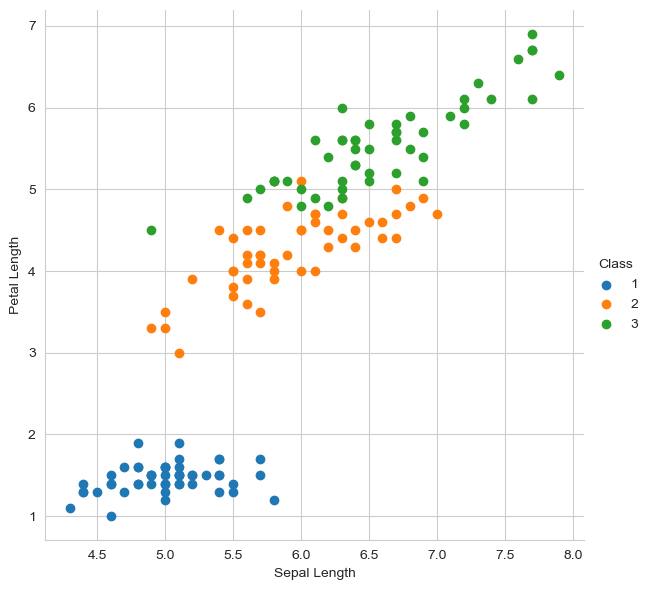

In [14]:
plt.figure(figsize = (5,5))
sb.set_style("whitegrid")
sb.FacetGrid(iris_data, hue ="Class",height = 6).map(plt.scatter,'Sepal Length','Petal Length').add_legend()

<AxesSubplot:xlabel='Class', ylabel='Sepal Width'>

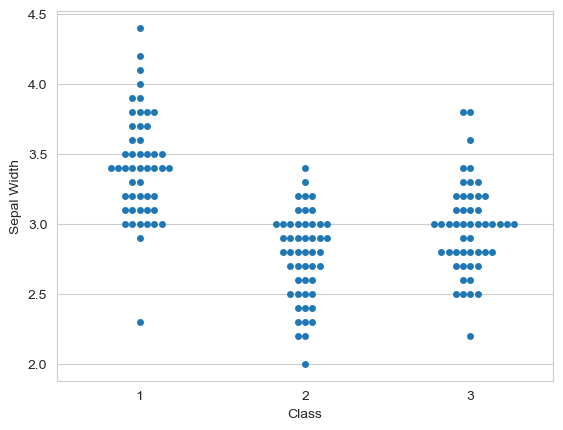

In [15]:
sb.swarmplot(x='Class',y='Sepal Width',data = iris_data)

Text(0.5, 1.0, 'Correlation Heatmap')

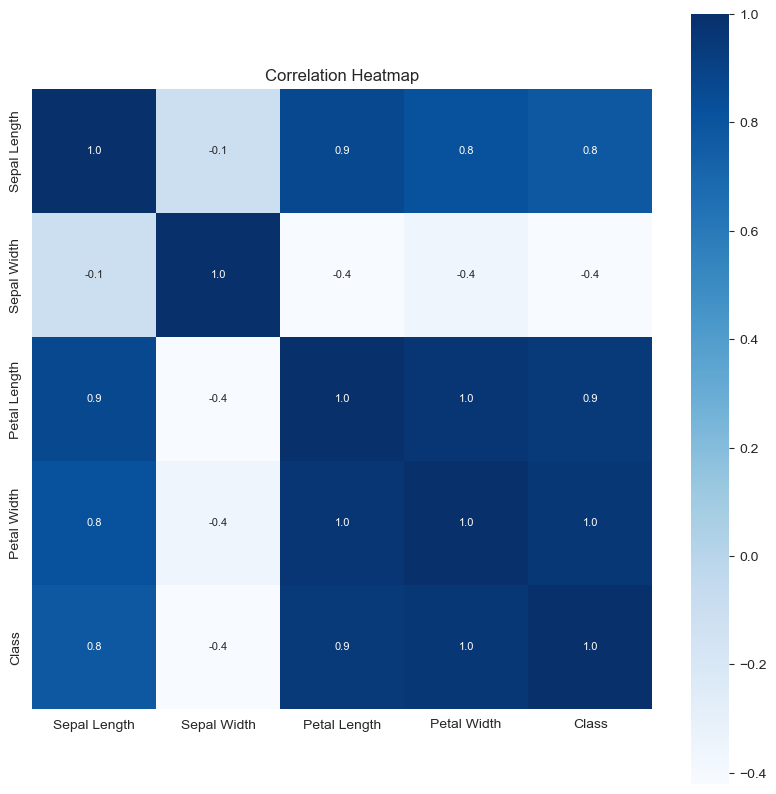

In [16]:
# For understand the correlation between the columns, we use heatmaps
plt.figure(figsize = (10,10))
sb.heatmap(iris_data.corr(), cbar = True, square = True, fmt = '.1f', annot = True, 
           annot_kws = {'size':8}, cmap = 'Blues').set_title('Correlation Heatmap')

# Splitting the new data into Features and Target

In [17]:
x = iris_data.drop(columns = ['Class'],axis = 1)
y = iris_data['Class']

In [18]:
x.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [19]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Class, dtype: int64

# Split the new dataset for training and testing

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 1)

In [21]:
(x.shape, x_train.shape, x_test.shape)

((150, 4), (112, 4), (38, 4))

In [22]:
(y.shape, y_train.shape, y_test.shape)

((150,), (112,), (38,))

# Model Training

## Using Logistic Regression

In [23]:
model_1 = LogisticRegression()

In [24]:
# training the model with training data
model_1.fit(x_train, y_train)
#training accuracy
model_1.score(x_train, y_train)

0.9821428571428571

In [25]:
#predicted outcomes
model_1_pred = model_1.predict(x_test)

## Using Random Forest Classifier

In [26]:
model_2 = RandomForestClassifier()

In [27]:
#training the Random Forest Classifier
model_2.fit(x_train, y_train)
#training accuracy
model_2.score(x_train, y_train)

1.0

In [28]:
#predicted outcomes
model_2_pred = model_2.predict(x_test)

## Using support vector machine

In [29]:
model_3 = svm.SVC(kernel = 'linear')

In [30]:
# training the support vector machine
model_3.fit(x_train, y_train)
#training accuracy
model_3.score(x_train, y_train)

0.9821428571428571

In [31]:
#predicted outcomes
model_3_pred = model_3.predict(x_test)

# Model Evaluation

## Evaluating Logistic Regression Model

### Confusion matrix

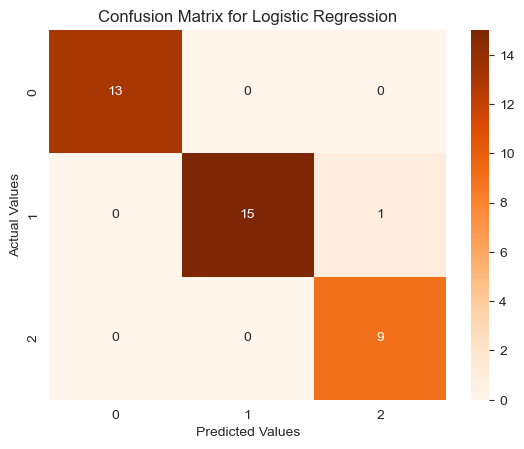

In [32]:
sb.heatmap(confusion_matrix(y_test, model_1_pred), annot=True, cmap = 'Oranges')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

### Distribution plot

C:\Users\hp\AppData\Local\Temp\ipykernel_18268\3090737024.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  actual = sb.distplot(y_test, color = 'r', label = 'Actual Value', hist = False)
C:\Users\hp\AppData\Local\Temp\ipykernel_18268\3090737024.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.d

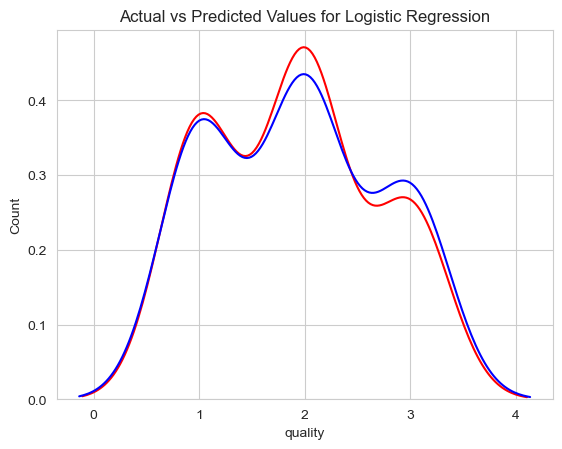

In [33]:
actual = sb.distplot(y_test, color = 'r', label = 'Actual Value', hist = False)
sb.distplot(model_1_pred, color = 'b', label = 'Predicted Value', hist = False, ax = actual)
plt.title('Actual vs Predicted Values for Logistic Regression')
plt.xlabel('quality')
plt.ylabel('Count')
plt.show()

### Classification Report

In [34]:
print(classification_report(y_test, model_1_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       1.00      0.94      0.97        16
           3       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



In [35]:
print('Accuracy Score: ', accuracy_score(y_test, model_1_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test, model_1_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, model_1_pred))
print('R2 Score: ', r2_score(y_test, model_1_pred))

Accuracy Score:  0.9736842105263158
Mean Absolute Error:  0.02631578947368421
Mean Squared Error:  0.02631578947368421
R2 Score:  0.9536585365853658


## Evaluating Random Forest Classifier

### Confusion matrix

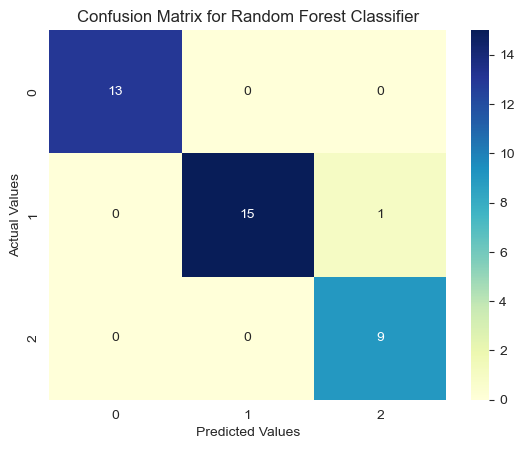

In [36]:
sb.heatmap(confusion_matrix(y_test, model_2_pred), annot=True, cmap = 'YlGnBu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

### Distribution plot

C:\Users\hp\AppData\Local\Temp\ipykernel_18268\2732082098.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  actual = sb.distplot(y_test, color = 'r', label = 'Actual Value', hist = False)
C:\Users\hp\AppData\Local\Temp\ipykernel_18268\2732082098.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.d

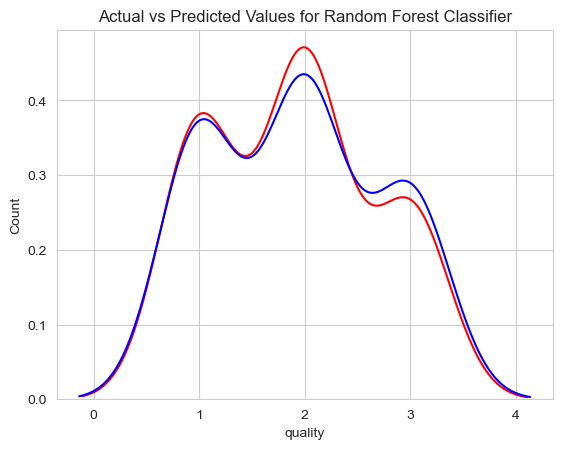

In [37]:
actual = sb.distplot(y_test, color = 'r', label = 'Actual Value', hist = False)
sb.distplot(model_2_pred, color = 'b', label = 'Predicted Value', hist = False, ax = actual)
plt.title('Actual vs Predicted Values for Random Forest Classifier')
plt.xlabel('quality')
plt.ylabel('Count')
plt.show()

### Classification Report

In [38]:
print(classification_report(y_test, model_2_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       1.00      0.94      0.97        16
           3       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



In [39]:
print('Accuracy Score: ', accuracy_score(y_test, model_2_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test, model_2_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, model_2_pred))
print('R2 Score: ', r2_score(y_test, model_2_pred))

Accuracy Score:  0.9736842105263158
Mean Absolute Error:  0.02631578947368421
Mean Squared Error:  0.02631578947368421
R2 Score:  0.9536585365853658


## Evaluating Support Vector Machine

### Confusion matrix

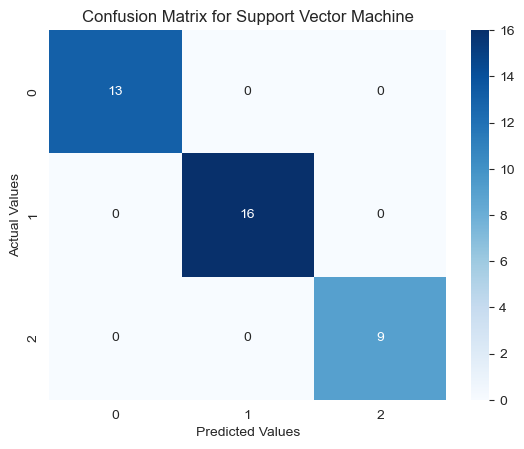

In [40]:
sb.heatmap(confusion_matrix(y_test, model_3_pred), annot=True, cmap = 'Blues')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix for Support Vector Machine')
plt.show()

### Distribution plot

C:\Users\hp\AppData\Local\Temp\ipykernel_18268\1942593133.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  actual = sb.distplot(y_test, color = 'r', label = 'Actual Value', hist = False)
C:\Users\hp\AppData\Local\Temp\ipykernel_18268\1942593133.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.d

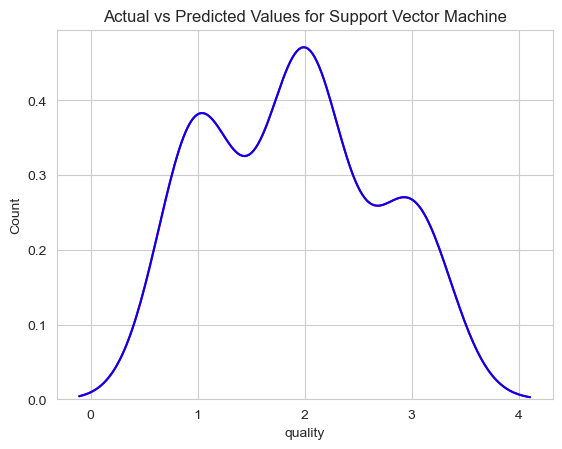

In [41]:
actual = sb.distplot(y_test, color = 'r', label = 'Actual Value', hist = False)
sb.distplot(model_3_pred, color = 'b', label = 'Predicted Value', hist = False, ax = actual)
plt.title('Actual vs Predicted Values for Support Vector Machine')
plt.xlabel('quality')
plt.ylabel('Count')
plt.show()

### Classification Report

In [42]:
print(classification_report(y_test, model_3_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00         9

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [43]:
print('Accuracy Score: ', accuracy_score(y_test, model_3_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test, model_3_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, model_3_pred))
print('R2 Score: ', r2_score(y_test, model_3_pred))

Accuracy Score:  1.0
Mean Absolute Error:  0.0
Mean Squared Error:  0.0
R2 Score:  1.0


# Comparing the models

Text(0.5, 1.0, 'Comparison of different models')

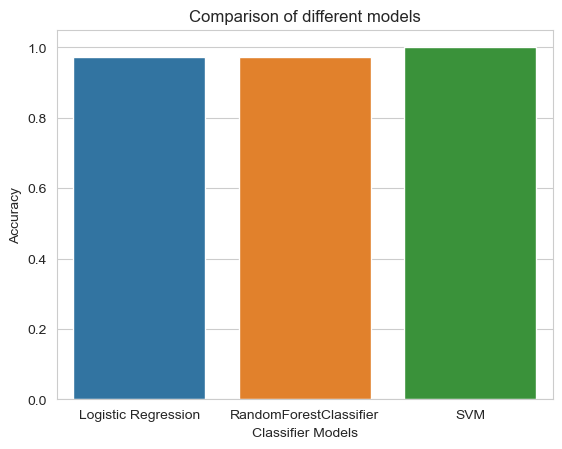

In [44]:
#comparing the accuracy of different models
sb.barplot(x = ['Logistic Regression', 'RandomForestClassifier', 'SVM'], y = [accuracy_score(y_test, model_1_pred), 
                                                                              accuracy_score(y_test, model_2_pred), 
                                                                              accuracy_score(y_test, model_3_pred)])
plt.xlabel('Classifier Models')
plt.ylabel('Accuracy')
plt.title('Comparison of different models')

Conclusion:-

From the data analysis for the classification models, We can see Logistic Regression and Random Forest Classifier gives 97% accuracy which is outperformed bt SVM with 100% accuracy. The accuracy of the models can be improved by increasing the size of the dataset. The dataset used for this project was very small and had only 150 rows. 

# Predicting the Iris Flower Class using SVM 

In [45]:
model_3_prediciton = model_3.predict(x)


for prediction in model_3_prediciton:
    if prediction == 1:
        print('Iris - Setosa',end = ', ') 
    elif prediction == 2:
        print('Iris - Versicolor',end = ', ')
    else:
        print('Iris - Virginica',end = ', ')

Iris - Setosa, Iris - Setosa, Iris - Setosa, Iris - Setosa, Iris - Setosa, Iris - Setosa, Iris - Setosa, Iris - Setosa, Iris - Setosa, Iris - Setosa, Iris - Setosa, Iris - Setosa, Iris - Setosa, Iris - Setosa, Iris - Setosa, Iris - Setosa, Iris - Setosa, Iris - Setosa, Iris - Setosa, Iris - Setosa, Iris - Setosa, Iris - Setosa, Iris - Setosa, Iris - Setosa, Iris - Setosa, Iris - Setosa, Iris - Setosa, Iris - Setosa, Iris - Setosa, Iris - Setosa, Iris - Setosa, Iris - Setosa, Iris - Setosa, Iris - Setosa, Iris - Setosa, Iris - Setosa, Iris - Setosa, Iris - Setosa, Iris - Setosa, Iris - Setosa, Iris - Setosa, Iris - Setosa, Iris - Setosa, Iris - Setosa, Iris - Setosa, Iris - Setosa, Iris - Setosa, Iris - Setosa, Iris - Setosa, Iris - Setosa, Iris - Versicolor, Iris - Versicolor, Iris - Versicolor, Iris - Versicolor, Iris - Versicolor, Iris - Versicolor, Iris - Versicolor, Iris - Versicolor, Iris - Versicolor, Iris - Versicolor, Iris - Versicolor, Iris - Versicolor, Iris - Versicolor, Iri